In [16]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
# HINTS
# http://www.ritchieng.com/machine-learning-project-boston-home-prices/

## Get Data

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

# features
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
# dependent variable
df['PRICE'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Simple Linear Regression
We use only one variable (here we choose _lstat_) as feature and we want to predict _price_.
- is there a relationship between _price_ and _lstat_ feature?
- how strong is the relationship?
- how accurately can we predict _price_ based on _lstat_ feature?
- is the relationship linear? 

In [29]:
# Lets use only one feature
df1 = df[['LSTAT', 'PRICE']]
X = df1['LSTAT']
y = df1['PRICE']

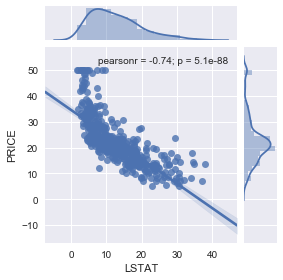

In [17]:
sns.jointplot(x="LSTAT", y="PRICE", data=df, kind="reg", size=4);

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [60]:
lr = LinearRegression()
lr.fit(X.to_frame(), y.to_frame())
# check that the coeffients are the expected ones.
b1 = lr.coef_[0]
b0 = lr.intercept_
print "b0: ", b0
print "b1: ", b1

y_pred = lr.predict(X.to_frame())
print "Mean squared error: ", mean_squared_error(y, y_pred)
print 'R^2 score : ', r2_score(y, y_pred)
print 'Explained variance score (in simple regression = R^2): ', explained_variance_score(y, y_pred)

# correlation
from scipy.stats import pearsonr
print "pearson correlation: ", pearsonr(X, y)

# p-values
# scikit-learn's LinearRegression doesn't calculate this information.
# we can take a look at statsmodels for this kind of statistical analysis in Python.

b0:  [ 34.55384088]
b1:  [-0.95004935]
Mean squared error:  38.4829672299
R^2 score :  0.544146297586
Explained variance score (in simple regression = R^2:  0.544146297586
pearson correlation:  (-0.73766272617401474, 5.0811033943890015e-88)


In [21]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LSTAT"], df["PRICE"])
print "slope: ", slope
print "intercept: ", intercept 
print "R^2: ",  r_value * r_value
print "Standard Error: ", std_err
print "p-value ", p_value

slope:  -0.950049353758
intercept:  34.5538408794
R^2:  0.544146297586
Standard Error:  0.0387334162126
p-value  5.08110339439e-88


- is there a relationship between price and lstat feature ?

In simple linear regression setting, we can simply check whether β1 =0 or not. Here β1 =-0.95 != 0 so  there is a relationship between price and lstat.

Accordingly, the _p-value_ (associated with the t-statistic) is << 1 so the alternative hypothesis is correct => there is some relationshop between _lstat_ and _price_

- how strong is the relationship?

This can be answered saying that, given a cerntain X, can we predict y with a a high level of accuracy? Or the prediction is slightly better than a random guess? 

The quantity to help us here is R^2 statistic.

R^2  measures the proportion of the variability of y that can be explained using X. 

Also R^2, in simple linear regression, is equal to r^2 = squared correlation, a measure of the linear relationship between X and y.

Hear R^2 = 0.5 so it is a relatively good value R^2ε[0,1]. It is challenging though to determine what is _good_ R^2. It depends on the application.

- how accurately can we predict _price_ (based on _lstat_ feature) ?

=> use prediction interval: if we want to predict individual response<br>
=> use confidence interval: if we want to predict the average response.

- is the relationship linear? 

The reply can come by plotting the residuals. If the relationship is linear then the residuals should not show any pattern.

## Multiple Linear Regression
We use few variables (here we choose _lstat_, _age_, and _indus_) as features and we want to predict _price_.
- is at least one of the predictors useful in predicting the price?
- which predictors help predicting price? All or a subset of them helping?
- how well does the model fit the data ?
- given a set of predictor values, what response value should we predict and what is our efficiency of prediction ? 

In [24]:
# Lets use only one feature
X = df[['LSTAT', 'AGE', 'INDUS']]
y = df['PRICE']

- is at least one of the predictors useful in predicting the price?

In multiple regression setting, we check wether β1=β2=β3=...=0.<br>
In multiple regression the F-statistic is used to determine wether or not we reject H0. <br>
So we look at the correspoinding p-value to the F-statistic.


- which predictors help predicting price? All or a subset of them helping?

=> One way is to examine the p-values associated with each predictors t-statistic. If low we keep the relative predictors help. BUT if this way might lead t ofalse discoveries (e.g. if p is large)<br>
=> Another way is to models with different subsets of variables, user metrics for model quality and get best score.

- how well does the model fit the data ?

=>We check the fraction of variance explained: R^2. <br>
=>Plotting of data will also give us good insights.
    

- given a set of predictor values, what response value should we predict and what is our efficiency of prediction ? 

=> use prediction interval: if we want to predict individual response<br>
=> use confidence interval: if we want to predict the average response.